In [ ]:
# GLT TEMPERATURES TASK

In [1]:
tempSource = '../data/GLT_filtered.csv'

In [25]:
import csv
dataset = [[], [], [], [], [], [], []]
with open(tempSource) as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        #print(row)
        for i in range(len(row)):
            dataset[i].append(row[i])

In [26]:
# Visualizing rows
for i in range(29505,29511):
    for j in range(len(dataset)):
        print(f'{dataset[j][i]} ', end='')
    print('')

2012-10-01 28.689 0.368 Bombay India 18.48N 72.68E 
2012-11-01 27.54 0.657 Bombay India 18.48N 72.68E 
2012-12-01 26.828000000000007 0.593 Bombay India 18.48N 72.68E 
1832-01-01   BrasÃ­lia Brazil 15.27S 47.50W 
1832-02-01 21.974 2.693 BrasÃ­lia Brazil 15.27S 47.50W 
1832-03-01 21.730999999999998 1.639 BrasÃ­lia Brazil 15.27S 47.50W 


In [ ]:
range(len(dataset))

In [ ]:
# Date is a Interval attribute,\
# Average temp, Uncertainty are Ratio attributes
# City, Country, Latitude, Longitude are nominal, I won't do computations with them

In [27]:
# We parse what we need to be float
for j in range(1,3):
    for i, data in enumerate(dataset[j]):
        if data != "" and data != " ":
            dataset[j][i] = float(data)


# Missing values handling ---> ERRATO

In [30]:
def isMissing(v):
    if v=="" or v==" ":
        return True
    else:
        return False


for k in range(1,3):
    for i in range(len(dataset[k])):
        if isMissing(dataset[k][i]):
            if i + 1 == len(dataset[k]):
                if dataset[3][i] == dataset[3][i - 1]:
                    dataset[k][i] = dataset[k][i - 1] / 2
            elif isMissing(dataset[k][i + 1]):
                for j in range(i+1, len(dataset[k])):
                    if not(isMissing(dataset[k][j])) and dataset[3][j] == dataset[3][i] and dataset[3][i] == dataset[3][i-1]:
                        if i-1 < 0 or (dataset[3][i] != dataset[3][i-1] and dataset[3][i] == dataset[3][j]):
                            dataset[k][i] = (dataset[k][j]) / 2
                            break
                        else:
                            dataset[k][i] = (dataset[k][j] + dataset[k][i - 1]) / 2
                            break
            elif dataset[3][i] == dataset[3][i-1] and dataset[3][i] == dataset[3][i+1]:
                dataset[k][i] = (dataset[k][i-1] + dataset[k][i+1]) / 2
            elif dataset[3][i] != dataset[3][i-1]:
                dataset[k][i] = dataset[k][i+1] / 2
                

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
for k in range(1,3):
    for data in dataset[k]:
        if isinstance(data, str) and data != '':
            print(data)

# ALTERNATIVE: If the values are not sorted by cities.

In [32]:
cities = set(dataset[3]) # Num of distinct cities
city_avg_temp = {}
city_avg_temp_unc = {}

for city in cities:
    idxs = [i for i, c in enumerate(dataset[3]) if c == city] # extract the indices
    city_avg_temp[city] = [dataset[1][i] for i in idxs]
    city_avg_temp_unc[city] = [dataset[2][i] for i in idxs]                                 


In [ ]:
def fill_gaps(data):
    right_i = 0
    right_v = 0
    
    for i, value in enumerate(data):
        if i==0:
            left_v = 0
        else:
            left_v = data[i-1]
            
        if i < right_i:
            data[i] = (left_v + right_v) / 2
            continue

        if value=='':
            for j in range(i+1, len(data)):
                if data[j] != "":
                    right_v = float(data[j])
                    break

            if i==len(data)-1:
                right_v = 0

            right_i = j
            data[i] = (left_v + right_v) / 2

        else:
            data[i] = float(data[i])
            
    for i, v in enumerate(data):
        dataset[idxs[i]] = v

# 1.3

In [2]:
# Let's use the fixed dataset: 
import csv

tempSourceNew = '../data/GLT_filtered_filled.csv'
dataset = [[], [], [], [], [], [], []]
with open(tempSourceNew) as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        #print(row)
        for i in range(len(row)):
            dataset[i].append(row[i])

cities = set(dataset[3]) # Num of distinct cities
city_avg_temp = {}
city_avg_temp_unc = {}

for city in cities:
    idxs = [i for i, c in enumerate(dataset[3]) if c == city] # extract the indices
    city_avg_temp[city] = [dataset[1][i] for i in idxs]
    city_avg_temp_unc[city] = [dataset[2][i] for i in idxs]                                 


In [ ]:
%%time
# Request 3:
# 1: top N hottest measurements
def topNhottest(city, n, city_avg_temp):
    avg_temps = [float(t) for t in city_avg_temp[city]]
    print(f"The lenght is:", len(avg_temps))
    #distinct_temps = set(avg_temps)
    top_n = []
    for i in range(n):
        curr_max = 0
        if i==0:
            for j, t in enumerate(avg_temps):
                if j==0:
                    curr_max = t
                elif t > curr_max:
                    curr_max = t
        else:
            for j, t in enumerate(avg_temps):
                if j==0 and t not in top_n:
                    curr_max = t
                elif t > curr_max and t not in top_n:
                    curr_max = t
        # We can append the i_th max and remove it from the set             
        top_n.append(curr_max)  
    
    print(top_n)
 


topNhottest("Rome", 5, city_avg_temp)         

In [10]:
# ALTERNATIVE BY PROF
%%time
def print_hottest_coolest(city, N, city_avg_temp):
    srtd = sorted(city_avg_temp[city], reverse=True)
    print(f'The top {N} hottest measurements taken in {city} are:', srtd[:N])
    print(f'The top {N} coolest measurements taken in {city} are:', srtd[-1:-(N+1):-1])
    
print_hottest_coolest('Rome', 5, city_avg_temp)

The top 5 hottest measurements taken in Rome are: ['9.989', '9.913', '9.886000000000001', '9.881', '9.864']
The top 5 coolest measurements taken in Rome are: ['-0.0680000000000005', '-0.1589999999999998', '-0.2749999999999999', '-0.5379999999999998', '-0.7069999999999994']
Wall time: 998 µs


# 1.4 - 1.5

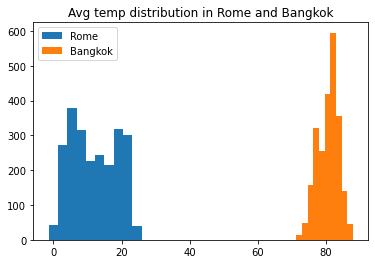

In [24]:
%matplotlib inline
from random import gauss
import matplotlib.pyplot as plt
plt.hist([float(t) for t in city_avg_temp['Rome']], label='Rome')
plt.hist([float(t) for t in city_avg_temp['Bangkok']], label='Bangkok')
plt.legend()
plt.title('Avg temp distribution in Rome and Bangkok')
plt.show()

In [46]:
def clean_farheneit(city_avg_temp):
    for k, v in city_avg_temp.items():
        for i, t in enumerate(v):
            if float(t) > 50:
                celsius_v = (float(t)-32)/1.8
                v[i] = celsius_v
        city_avg_temp[k] = v
        
clean_farheneit(city_avg_temp)

In [47]:
city_avg_temp['Bangkok']

[23.990000000000002,
 26.785999999999998,
 27.898000000000003,
 29.125999999999998,
 27.386000000000013,
 26.324,
 26.803999999999995,
 27.284,
 24.424,
 24.204,
 24.61,
 21.926999999999996,
 23.961000000000002,
 24.720999999999997,
 28.755000000000006,
 30.407000000000004,
 29.23,
 28.676,
 26.661,
 26.93,
 25.677000000000003,
 24.50800000000001,
 24.776,
 23.822,
 22.867999999999995,
 25.192,
 26.467500000000005,
 27.743,
 27.731,
 27.445999999999998,
 26.554000000000002,
 26.247000000000003,
 26.282000000000004,
 26.316999999999997,
 24.870999999999995,
 22.979,
 23.937,
 24.895000000000003,
 27.716999999999995,
 29.707,
 29.061999999999998,
 27.9125,
 26.762999999999998,
 25.876,
 26.515,
 25.172999999999995,
 24.19100000000001,
 22.749,
 25.371,
 27.243999999999996,
 28.607999999999997,
 28.75,
 29.115,
 27.867999999999995,
 26.735000000000003,
 26.907000000000004,
 25.501000000000005,
 25.861,
 25.625,
 24.127000000000002,
 25.599999999999998,
 28.079000000000004,
 30.95100000000

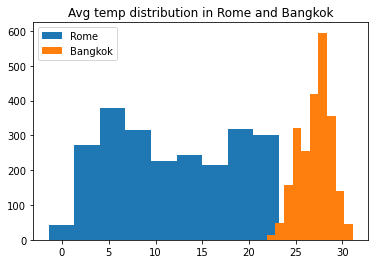

In [48]:
%matplotlib inline
from random import gauss
import matplotlib.pyplot as plt
plt.hist([float(t) for t in city_avg_temp['Rome']], label='Rome')
plt.hist([float(t) for t in city_avg_temp['Bangkok']], label='Bangkok')
plt.legend()
plt.title('Avg temp distribution in Rome and Bangkok')
plt.show()

# Part 2: IMdB

In [ ]:
!wget https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/aclimdb_reviews_train.csv

In [1]:
import pandas as pd

df = pd.read_csv('aclimdb_reviews_train.csv')

In [2]:
dataset = []
dataset.append(df['review'].tolist())
dataset.append(df['label'].tolist())

In [3]:
import string

def tokenize(docs):
    """Compute the tokens for each document.
    Input: a list of strings. Each item is a document to tokenize.
    Output: a list of lists. Each item is a list containing the tokens of the
    relative document.
    """
    tokens = []
    for doc in docs:
        for punct in string.punctuation:
            doc = doc.replace(punct, " ")
        split_doc = [ token.lower() for token in doc.split(" ") if token ]
        tokens.append(split_doc)
    return tokens

dataset[0] = tokenize(dataset[0])

In [4]:
def compute_TF(docs):
    tf_list = []
    for tokens in docs:
        tf_list.append({x: tokens.count(x) for x in tokens})
    return tf_list

In [5]:
tf_list = compute_TF(dataset[0])

In [8]:
tokens_set = set()
for tokens in dataset[0]:
    for t in tokens:
        tokens_set.add(t)


In [39]:
import math

def compute_IDF(TF_list):
    DF = {}
    N = len(TF_list)
    # We already have the distinct tokens in the keys of TF_list dictionaries
    # compute the document-frequency (DF), i.e. the number of documents in which each token appears at least once 
    for review_tf in TF_list:
        for token, token_tf in review_tf.items():
            DF[token] = DF.get(token, 0) + 1
    # compute the actual IDF
    return {token: math.log(N / df) for token, df in DF.items()}

In [43]:
idf_dict = compute_IDF(tf_list)

In [28]:
"""import math

def compute_IDF(df_dict, N):
    idf_dict = {}
    for t, df in df_dict.items():
        idf_dict[t] = math.log(N / df)     
    return idf_dict"""

In [44]:
def compute_TF_IDF(tf_list, idf_dict):
    tf_idf_list = []
    for dic in tf_list:
        for t, v in dic.items():
            dic[t] = v*idf_dict[t]
        tf_idf_list.append(dic)
    return tf_idf_list

In [45]:
tf_idf = compute_TF_IDF(tf_list, idf_dict)

# Part 6: sentiment analysis

In [58]:
test_doc = tf_idf[1]

In [53]:
pos_rev = []
neg_rev = []

for i, lab in enumerate(dataset[1]):
    if lab == 1:
        pos_rev.append(tf_idf[i])
    else:
        neg_rev.append(tf_idf[i])

In [50]:
def norm(d):
    """Compute the L2-norm of a vector representation."""
    return sum([ tf_idf**2 for t, tf_idf in d.items() ])**.5
def dot_product(d1, d2):
    """Compute the dot product between two vector representations."""
    word_set = set(list(d1.keys()) + list(d2.keys()))
    return sum([( d1.get(d, 0.0) * d2.get(d, 0.0)) for d in word_set ])
def cosine_similarity(d1, d2):
    """
    Compute the cosine similarity between documents d1 and d2.
    Input: two dictionaries representing the TF-IDF vectors for documents
    d1 and d2.
    Output: the cosine similarity.
    """
    return dot_product(d1, d2) / (norm(d1) * norm(d2))

In [59]:
# Let's compute cosine sim between test_doc and all the other pos and neg revs.
pos_sim = []
for rev in pos_rev:
    pos_sim.append(cosine_similarity(test_doc, rev))
    
neg_sim = []
for rev in neg_rev:
    neg_sim.append(cosine_similarity(test_doc, rev))

In [60]:
pos_avg = sum(pos_sim)/len(pos_sim)
neg_avg = sum(neg_sim)/len(neg_sim)

In [61]:
pos_avg

0.010257532218721836

In [62]:
neg_avg

0.009558932096360356